In [71]:
! pip install fastai
! pip install surprise
#  had to downgrade the sklearn to use with lambda
!pip install scikit-learn==1.0.1

In [72]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from surprise.model_selection import train_test_split
from scipy.sparse import coo_matrix, csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from surprise import Reader, Dataset, KNNBasic
from surprise.model_selection import cross_validate
from surprise import SVD

In [73]:
import sklearn

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.1.


In [74]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [75]:
downloaded = drive.CreateFile({'id':"1C7yioHe3RDgbfZp3U8qTfZGeNR5_DJo4"})
downloaded.GetContentFile('category-lower-all-everything.txt')

### Loading of data

In [76]:
df_lower = pd.read_csv('category-lower-all-everything.txt', sep=":")
df_lower.head()

,Unnamed: 0,t_floral,t_stripe,t_dot,f_denim,f_leather,f_cotton,f_knit,f_pleated,s_fit,s_pencil,s_midi,s_mini,s_maxi,p_zipper,total
0,img/Mineral_Wash_Mini_Skirt/img_00000001.jpg,0,0,0,1,0,0,0,0,0,1,1,0,0,0,3
1,img/Mineral_Wash_Mini_Skirt/img_00000002.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,img/Mineral_Wash_Mini_Skirt/img_00000003.jpg,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,img/Mineral_Wash_Mini_Skirt/img_00000004.jpg,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,img/Mineral_Wash_Mini_Skirt/img_00000005.jpg,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2


In [77]:
downloadedUpper = drive.CreateFile({'id':"1K5VK5yDoVqFRIbaY5KKaRApkK4up3h27"})
downloadedUpper.GetContentFile('category-upper-all-everything.txt')

In [78]:
df_upper = pd.read_csv('category-upper-all-everything.txt', sep=":")
df_upper.head()

,Unnamed: 0,t_floral,t_stripe,t_dot,f_lace,f_denim,f_chiffon,f_cotton,f_leather,f_fur,p_sleeveless,p_long-sleeve,p_collar,p_pocket,p_v-neck,p_button,p_hooded,p_zipper,total
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Cleaning upper

In [79]:
del df_upper['total']
df_upper = df_upper.iloc[: , 1:]
df_upper

,t_floral,t_stripe,t_dot,f_lace,f_denim,f_chiffon,f_cotton,f_leather,f_fur,p_sleeveless,p_long-sleeve,p_collar,p_pocket,p_v-neck,p_button,p_hooded,p_zipper
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139704,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
139705,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
df_upper.to_csv("df_upper.csv")

In [81]:
## Feature Scaling
StandardScaler = StandardScaler()
df_upper_standardscalar = StandardScaler.fit_transform(df_upper)
df_upper_standardscalar

array([[-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       ...,
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516]])

Clustering upper and lower dataframes

In [82]:
kmeans = KMeans(n_clusters=12, random_state=42).fit(df_upper_standardscalar)
labels = kmeans.labels_
kmeans

KMeans(n_clusters=12, random_state=42)

In [83]:
df_upper['label_kmeans'] = labels
df_upper

,t_floral,t_stripe,t_dot,f_lace,f_denim,f_chiffon,f_cotton,f_leather,f_fur,p_sleeveless,p_long-sleeve,p_collar,p_pocket,p_v-neck,p_button,p_hooded,p_zipper,label_kmeans
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,11
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139704,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
139705,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
import pickle
filename = 'df_upper_kmeans.pkl'
pickle.dump(kmeans, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

KMeans(n_clusters=12, random_state=42)

In [85]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.1.


## predicting the labels based on the incomming attributes

In [86]:
## predicting the clusters for the top labels
from sklearn.metrics import pairwise_distances_argmin_min
from collections import Counter

pred=[1, 1,	0,	0,	0,	1,	1,	1,	1,	0,	0,	0,	0,	1,	1,	1,	0]
pred=np.asarray(pred)
loaded_model_test=loaded_model.fit(pred.reshape(-1, 1))
closest, _ = pairwise_distances_argmin_min(loaded_model.cluster_centers_, pred.reshape(-1, 1))
closest
b = Counter(closest)
b.most_common(1)[0][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  import sys


2

In [87]:
centers = kmeans.cluster_centers_

In [88]:
reduced_data = PCA(n_components=2).fit_transform(df_upper_standardscalar)
principalDf = pd.DataFrame(data = reduced_data
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-0.191587,-0.345391
1,-0.191587,-0.345391
2,-0.488097,1.054406
3,-0.191587,-0.345391
4,-0.191587,-0.345391
...,...,...
139704,-0.432173,2.209967
139705,-0.191587,-0.345391
139706,-0.191587,-0.345391
139707,-0.191587,-0.345391


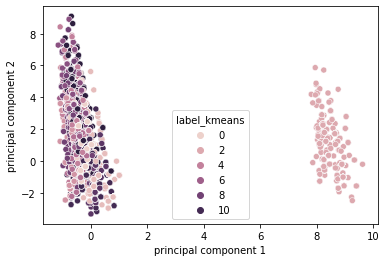

In [89]:
sns.scatterplot(x="principal component 1", y="principal component 2", hue=df_upper['label_kmeans'], data=principalDf)

### Lower

In [90]:
del df_lower['total']
df_lower = df_lower.iloc[: , 1:]
df_lower

,t_floral,t_stripe,t_dot,f_denim,f_leather,f_cotton,f_knit,f_pleated,s_fit,s_pencil,s_midi,s_mini,s_maxi,p_zipper
0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58958,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58959,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58960,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58961,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
df_lower.to_csv("df_lower.csv")

In [92]:
## Feature Scaling
df_lower_standardscalar = StandardScaler.fit_transform(df_lower)
df_lower_standardscalar

array([[-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       ...,
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646]])

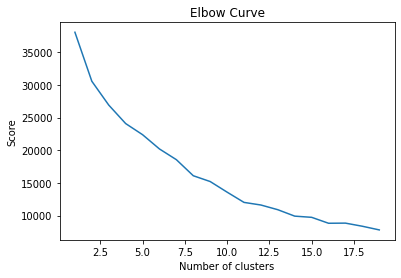

In [93]:
SSE = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=1500,n_init=10,random_state=0)
    kmeans.fit(df_lower)
    SSE.append(kmeans.inertia_)
plt.plot(range(1,20),SSE)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

In [94]:
kmeans_lower = KMeans(n_clusters=12, random_state=42).fit(df_lower_standardscalar)
labels_lower = kmeans.labels_

In [95]:
df_lower['label_kmeans'] = labels_lower
df_lower

,t_floral,t_stripe,t_dot,f_denim,f_leather,f_cotton,f_knit,f_pleated,s_fit,s_pencil,s_midi,s_mini,s_maxi,p_zipper,label_kmeans
0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,11
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58958,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
58959,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
58960,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
58961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [96]:
import pickle
filename = 'df_lower_kmeans.pkl'
pickle.dump(kmeans_lower, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

KMeans(n_clusters=12, random_state=42)

In [97]:
centers_lower = kmeans_lower.cluster_centers_

In [98]:
reduced_data_lower = PCA(n_components=2).fit_transform(df_lower_standardscalar)
principalDf_lower = pd.DataFrame(data = reduced_data_lower
             , columns = ['principal component 1', 'principal component 2'])
principalDf_lower

,principal component 1,principal component 2
0,1.819160,0.421892
1,-0.228366,-0.133565
2,-1.572553,-0.329577
3,0.841487,0.359788
4,-0.502700,0.163775
...,...,...
58958,-1.572553,-0.329577
58959,-1.572553,-0.329577
58960,-1.572553,-0.329577
58961,-0.228366,-0.133565


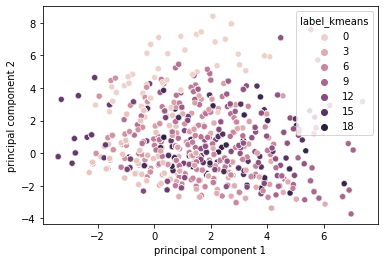

In [99]:
sns.scatterplot(x="principal component 1", y="principal component 2", hue=df_lower['label_kmeans'], data=principalDf_lower)

### Top bottom rating table
Mapped upper and lower items

In [100]:
downloadedRating = drive.CreateFile({'id':"10zqzA3-v8VfU37v7jxcaE4wbj-L0oRKg"})
downloadedRating.GetContentFile('rating.csv')

In [101]:
df_top_bottom_rating = pd.read_csv('rating.csv')
df_top_bottom_rating.head()

,Unnamed: 0,top,bottom,itemRating
0,0,8188,52013,4.0
1,1,9532,39863,5.0
2,2,2541,55868,1.0
3,3,25719,52417,4.0
4,4,25701,13091,5.0


In [102]:
for i, j in df_top_bottom_rating["top"].iteritems():
    df_top_bottom_rating["topClusterRating"]=df_upper["label_kmeans"]

In [103]:
for i, j in df_top_bottom_rating["bottom"].iteritems():
    df_top_bottom_rating["bottomClusterRating"]=df_lower["label_kmeans"]

## Cluster mapping

In [104]:
df_top_bottom_rating

,Unnamed: 0,top,bottom,itemRating,topClusterRating,bottomClusterRating
0,0,8188,52013,4.0,0,11
1,1,9532,39863,5.0,0,2
2,2,2541,55868,1.0,11,1
3,3,25719,52417,4.0,0,4
4,4,25701,13091,5.0,0,1
...,...,...,...,...,...,...
70,70,60532,5934,1.0,11,10
71,71,138258,55322,5.0,0,18
72,72,5850,53159,3.0,6,1
73,73,90409,58203,3.0,0,11


In [105]:
cluster_mapping=df_top_bottom_rating[["topClusterRating", "bottomClusterRating", "itemRating"]]
cluster_mapping

,topClusterRating,bottomClusterRating,itemRating
0,0,11,4.0
1,0,2,5.0
2,11,1,1.0
3,0,4,4.0
4,0,1,5.0
...,...,...,...
70,11,10,1.0
71,0,18,5.0
72,6,1,3.0
73,0,11,3.0


In [106]:
cluster_mapping_average=cluster_mapping.groupby(['topClusterRating','bottomClusterRating'])['itemRating'].mean().reset_index()
cluster_mapping_average=pd.DataFrame(cluster_mapping_average)
cluster_mapping_average.to_csv("cluster_mapping_average.csv")

## Collaborative Filtering

In [107]:
cluster_mapping_average=cluster_mapping.groupby(['topClusterRating','bottomClusterRating'])['itemRating'].mean().reset_index()
cluster_mapping_average=pd.DataFrame(cluster_mapping_average)
cluster_mapping_average

,topClusterRating,bottomClusterRating,itemRating
0,0,0,3.000000
1,0,1,3.466667
2,0,2,3.466667
3,0,4,4.000000
4,0,5,2.000000
5,0,8,5.000000
6,0,11,4.000000
7,0,12,2.000000
8,0,14,4.000000
9,0,18,2.500000


In [108]:
df_ratings = cluster_mapping_average.pivot(index='topClusterRating', columns='bottomClusterRating', values='itemRating')
df_ratings

bottomClusterRating,0,1,2,4,5,7,8,10,11,12,14,18
topClusterRating,,,,,,,,,,,,
0,3.0,3.466667,3.466667,4.0,2.0,NaN,5.0,NaN,4.0,2.0,4.0,2.5
3,NaN,2.000000,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3.000000,3.000000,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.5
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
6,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
7,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,1.000000,2.500000,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,2.5


In [109]:
df_ratings_clean = df_ratings.fillna(0)
df_ratings_clean.head()
df_ratings_clean.to_csv("df_ratings_clean.csv", index=False)

In [110]:
clothingVar = np.array(df_ratings_clean.var(axis=1))
print("Maximum Movie Varinance is :", max(clothingVar))
print("Minimum Movie Varinance is :", min(clothingVar))
clothingVar = clothingVar[~np.isnan(clothingVar)]

Maximum Movie Varinance is : 2.466961279461279
Minimum Movie Varinance is : 0.9924242424242422


In [111]:
print(clothingVar)

[2.46696128 0.99242424 2.3844697  1.33333333 1.36363636 1.33333333
 1.85606061]


More number of clothes are located in the first 3 clusters

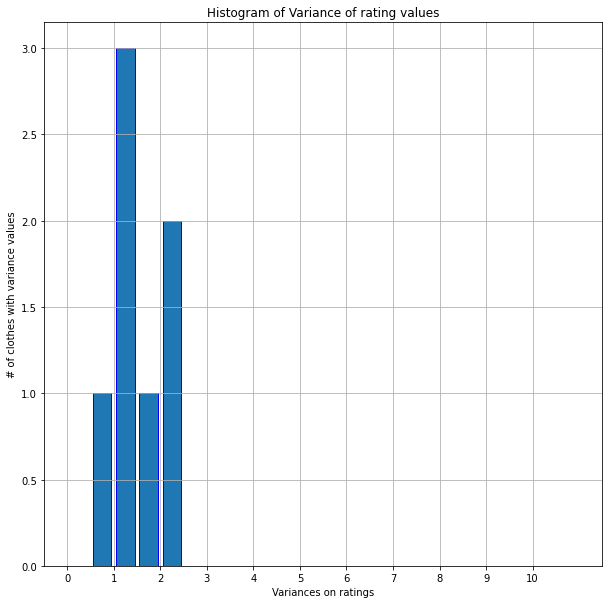

In [112]:
plt.figure(figsize=(10,10))

bin_edges = np.arange(0.0,11.5,0.5)

plt.hist(clothingVar,bins = bin_edges,edgecolor="b",rwidth=0.8)
plt.title('Histogram of Variance of rating values')
plt.xlabel('Variances on ratings')
plt.ylabel('# of clothes with variance values')
plt.grid('on')

plt.xticks(np.arange(0.0,11,1))
plt.show()

In [113]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader

In [114]:
df_rating=cluster_mapping_average["itemRating"]
df_rating=pd.DataFrame(df_rating)

In [115]:
reader = Reader(rating_scale=(1, 5))
df_cf=Dataset.load_from_df(cluster_mapping_average[['topClusterRating',	'bottomClusterRating',	'itemRating']], reader)
print(df_cf)

In [116]:
# We'll use the =KNN With Means algorithm.
Avg_RMSE = []
Avg_MAE = []
# Run 10-fold cross-validation and print results
for k in range(2,102,2):
    algo = KNNWithMeans(k=k, verbose=False)
    cv = cross_validate(algo, df_cf, measures=['RMSE', 'MAE'], cv=10, verbose=False)
    rmse_mean =  cv['test_rmse'].mean()
    mae_mean = cv['test_mae'].mean()
    Avg_RMSE.append(rmse_mean) 
    Avg_MAE.append(mae_mean)

In [117]:
cv['test_rmse'].mean()
cv['test_mae'].mean() 

0.9115245547830426

In [118]:
print(Avg_RMSE)

[1.0443377590831928, 1.039762443137051, 1.043772400086059, 1.0444866545240825, 0.9905372715004528, 0.8912520186214486, 1.053067385498767, 1.157057490046116, 1.028982723769699, 1.048004351045066, 0.990682871245725, 1.085144612032028, 1.002175788761028, 0.9999245058599009, 0.9084442745928817, 1.007989365366727, 0.9897820570645341, 0.9849354656608588, 0.967547705235457, 1.0114624721808703, 1.1292083353216722, 0.9553096531189377, 0.9694704398484582, 1.0573497153804368, 1.0878329668226125, 0.9550694122790089, 1.077078594087643, 1.0849551544573441, 1.0148901927092324, 1.0586302025291463, 1.04018248594256, 0.9649725604113417, 1.0613120188043605, 1.0386974197458818, 1.0013557717416222, 0.9930684355341037, 1.0441209921118608, 1.0553827825820343, 1.0797345240162883, 1.093566305270848, 1.0368703361729255, 0.987171006259338, 1.0361740013616403, 1.076606290877865, 1.0778150878766168, 1.0447231948275082, 1.0071874469569095, 1.0039072118340888, 1.053739769037128, 1.0164535949844598]


In [119]:
kValue = np.arange(2,102,2)
print(kValue)

[  2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36
  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72
  74  76  78  80  82  84  86  88  90  92  94  96  98 100]


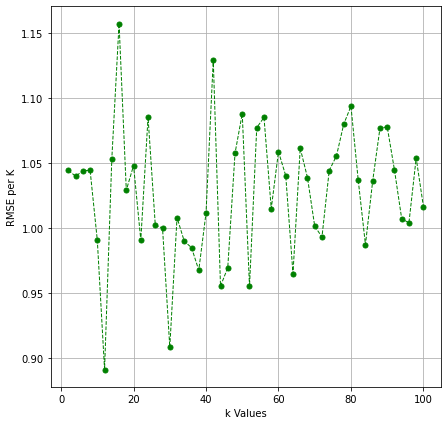

0.8912520186214486


In [120]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

width = 1/1.5
plt.plot(kValue, Avg_RMSE, 'go--', linewidth=1, markersize=5)

plt.xlabel('k Values')
plt.ylabel('RMSE per K')
plt.grid('on')

plt.show()
print(min(Avg_RMSE))

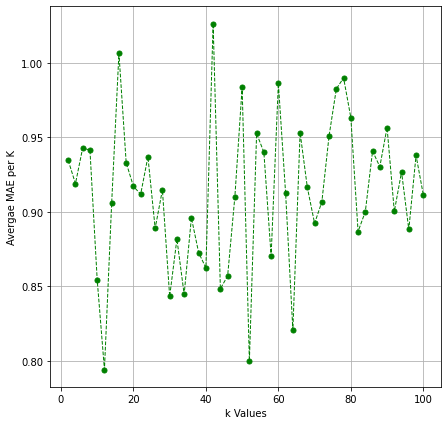

0.7940355400856561


In [121]:
plt.figure(figsize=(7,7))
width = 1/1.5
plt.plot(kValue, Avg_MAE, 'go--', linewidth=1, markersize=5)
plt.xlabel('k Values')
plt.ylabel('Avergae MAE per K')
plt.grid('on')

plt.show()
print(min(Avg_MAE))

In [122]:
def popular_clothing(inputData):
          outputData= inputData.drop(inputData[inputData.itemRating <=2].index)
          return outputData

In [123]:
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold

data = Dataset.load_from_df(cluster_mapping_average[['topClusterRating',	'bottomClusterRating',	'itemRating']], reader)

# define a cross-validation iterator
kf = KFold(n_splits=10)
# We'll use the =KNN With Means algorithm.
Avg_RMSE_fold = []
Avg_RMSE_k = []
# Run 10-fold cross-validation and print results
for k in range(2,102,1):
    algo = KNNWithMeans(k=k, verbose=False)
    for trainset, testset in kf.split(data):
            algo.fit(trainset)
            testset_df = pd.DataFrame(testset, columns=['topClusterRating',	'bottomClusterRating',	'itemRating'])
            clothingData = testset_df.set_index(['topClusterRating'])
            popular_testset = popular_clothing(clothingData)
            popular_data = popular_testset.reset_index()
            testset_list = popular_data.values.tolist()
            predictions =algo.test(testset_list)
            # Compute and print Root Mean Squared Error
            if(predictions):
              rmse_fold_p = accuracy.rmse(predictions, verbose=False)
              Avg_RMSE_fold.append(rmse_fold_p)
            
    Avg_RMSE_k.append(np.mean(Avg_RMSE_fold))

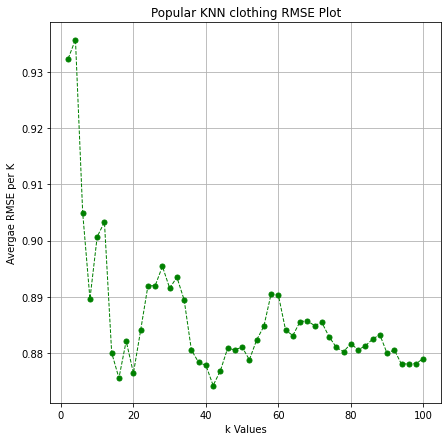

0.8654293561264973


In [124]:
kvalue =np.arange(2,102,2)
plt.figure(figsize=(7,7))
width = 1/1.5
plt.plot(kvalue[:50], Avg_RMSE_k[:50], 'go--', linewidth=1, markersize=5)
plt.xlabel('k Values')
plt.ylabel('Avergae RMSE per K')
plt.title("Popular KNN clothing RMSE Plot")
plt.grid('on')
plt.show()
print(min(Avg_RMSE_k))